In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [27]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution(object):
    def Copy(self, targetNode):
        node = ListNode()
        node.next = targetNode.next
        node.val = targetNode.val
        return node
        
    def isPalindrome(self, head):
        """
        :type head: ListNode
        :rtype: bool
        """
        if head.next == None:
            return True
        if head.next.next == None:
            if head.val == head.next.val:
                return True
            else:
                return False
        
        ford0 = head
        
        flipBack = self.Copy(head.next.next)
        flipBack.next = self.Copy(head.next)
        flipBack.next.next = head
        flipFord = flipBack.next
        
        while ford0.next.next != None:
            ford1 = ford0.next
            ford2 = ford0.next.next
            print(ford0.val, ford1.val, ford2.val)
            temp = self.Copy(ford2)
            temp.next = flipFord
            flipFord = temp
            if flipBack.next != head and flipBack.next.next != None and ford0.val == flipBack.val and ford1.val == flipBack.next.val and ford2.val == flipBack.next.next.val:
                flipBack = flipBack.next
                print(0)
            elif ford0.val == ford2.val:
                flipBack = flipFord.next
                print(1)
            else:
                flipBack = flipFord
                print(2)
            ford0 = ford0.next
        if flipBack.next==head:
            return True
        return False

        
            
        

1 2 1
0
2 1 2
0
1 2 1
0


False

1D lattice

In [2]:
atoms = ['a']
biases = [0.0]
a1 = 1.0
N = 20
def Labels1D(N):
    result = []
    for i in range(1,N+1,1):
        for j in range(len(atoms)):
            result.append((i,atoms[j]))
    return result
def LabelToR1D(myLabel):
    atomIndex = atoms.index(myLabel[1])
    unitCellIndex = myLabel[0] - 1
    unitCellR = unitCellIndex * a1
    biasInUnitCell = biases[atomIndex]
    return unitCellR + biasInUnitCell
def LabelToIndex1D(myLabel):
    numAtomsInCell = len(atoms)
    unitCellIndex = myLabel[0] - 1
    return unitCellIndex * numAtomsInCell + atoms.index(myLabel[1])

def MomentumLabels1D(N):
    result = []
    for i in range(N):
        for j in range(len(atoms)):
            result.append((i,atoms[j]))
    return result
def MomentumLabelToK1D(myLabel):
    b1 = 2 * np.pi / (N * a1)
    unitCellIndex = myLabel[0]
    unitCellK = unitCellIndex * b1
    return unitCellK
def Hamiltonian1D():
    h = np.zeros((N,N))
    for i in range(N-1):
        h[i,i+1] = -1.0
        h[i+1,i] = -1.0
    h[N-1,0] = -1.0
    h[0,N-1] = -1.0
    return h
def Fourier1D():
    f = np.zeros((N,N), dtype=complex)
    for i in range(N):
        r = LabelToR1D((i,'a'))
        for jj in range(N):
            k = MomentumLabelToK1D((jj,'a'))
            f[i,jj] = (N**(-0.5)) * np.exp(1j * k * r)
    return f

c:\Users\Yubisoft\anaconda3\envs\scientific\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


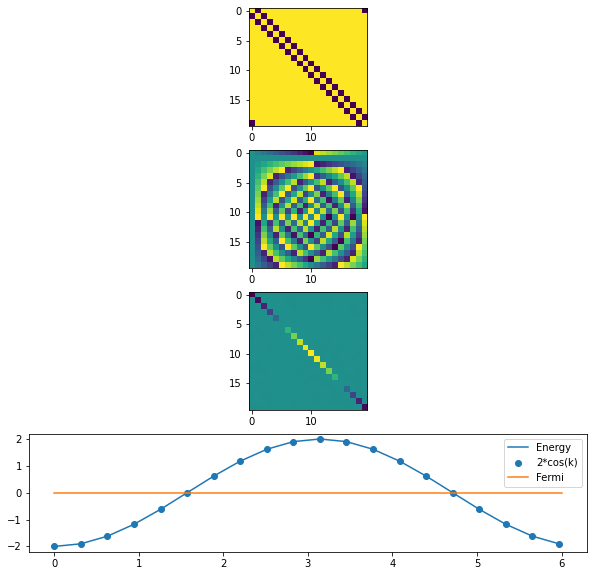

In [3]:
h = Hamiltonian1D()
f = Fourier1D()
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(411)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)
hk =  (np.conj(f)).T @ h @ f
ax1.imshow(h)
ax2.imshow(np.angle(f))
ax3.imshow(np.real(hk))

e = np.diag(hk)
kspace = MomentumLabels1D(N)
k = []
for i in range(N * len(atoms)):
    k.append(MomentumLabelToK1D(kspace[i]))
    
ax4.plot(np.array(k),e, label = 'Energy')
ax4.scatter(np.array(k), -2*np.cos(k), label = '2*cos(k)')
ax4.plot([0,6],[np.median(e), np.median(e)], label = 'Fermi')
ax4.legend()

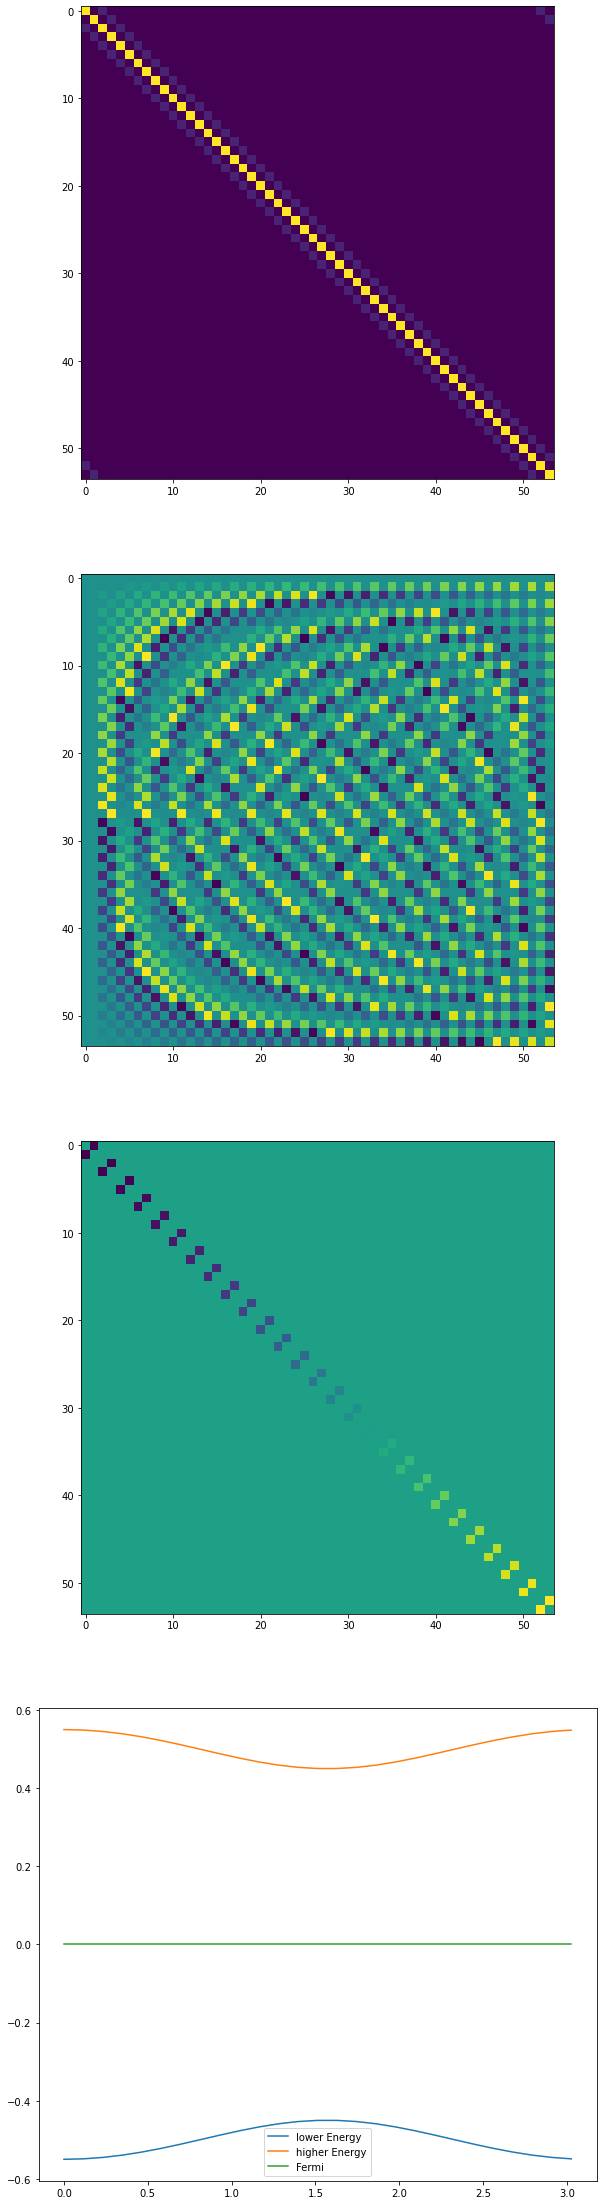

In [4]:
atoms = ['a','b']
biases = [0.0,0.8]
a1 = 2.0
N = 27

def FourierDistorted1D():
    momentumLabels = MomentumLabels1D(N)
    labels = Labels1D(N)
    n = N * len(atoms)
    f = np.zeros((n,n), dtype=complex)
    for i in range(n):
        r = LabelToR1D(labels[i])
        sigmaPrime = labels[i][1]
        for jj in range(n):
            sigma = momentumLabels[jj][1]
            if(sigma == sigmaPrime): 
                k = MomentumLabelToK1D(momentumLabels[jj])
                f[i,jj] = (n**(-0.5))* np.exp(1j * k * r)
    return f
def HamiltonianDistorted1D():
    n = N * len(atoms)
    h = np.zeros((n,n))
    for i in range(n):
        for j in range(len(atoms)-1):
            x = LabelToIndex1D((i+1,atoms[j]))%n
            y = LabelToIndex1D((i+1,atoms[j+1]))%n
            h[x,y] = -1.0
            h[y,x] = -1.0
        x = LabelToIndex1D((i+1,atoms[-1]))%n
        y = LabelToIndex1D((i+2, atoms[0]))%n
        h[x,y] = -0.1
        h[y,x] = -0.1
    return h


h = HamiltonianDistorted1D()
f = FourierDistorted1D()
fig = plt.figure(figsize=(10,40))
ax1 = plt.subplot(411)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)
hk =  (np.conj(f)).T @ h @ f
ax1.imshow(np.real(h @ np.conj(h).T))
ax2.imshow(np.angle(f))
ax3.imshow(np.real(hk))

E1 = []
E2 = []
for i in range(0, hk.shape[0], 2):
    block = hk[i:i+2,i:i+2]
    eigs = la.eigh(block)[0]
    E1.append(eigs[0])
    E2.append(eigs[1])
kspace = MomentumLabels1D(N)
k = []
for i in range(0, N * len(atoms), 2):
    k.append(MomentumLabelToK1D(kspace[i]))
E = np.concatenate((E1,E2))
ax4.plot(np.array(k),E1, label = 'lower Energy')
ax4.plot(np.array(k),E2, label = 'higher Energy')
ax4.plot([0,np.max(k)], [np.median(E), np.median(E)], label = 'Fermi')
ax4.legend()

2D lattice

5


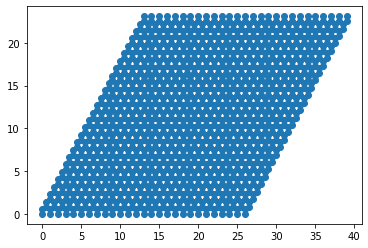

In [5]:
atoms = ['a','b']
biases = [np.array([0,0]), np.array([0.0, 1 / 3**0.5])]
a1 = np.array([1,0])
a2 = np.array([0.5, (3**0.5)/2])
N1 = 27
N2 = 27
def Labels(N1,N2):
    result = []
    for m in range(1,N1+1,1):
        for n in range(1,N2+1,1):
            for j in range(len(atoms)):
                result.append(((m,n),atoms[j]))
    return result
def LabelToR(myLabel):
    atomIndex = atoms.index(myLabel[1])
    unitCellIndex = (myLabel[0][0] - 1, myLabel[0][1] - 1)
    unitCellR = unitCellIndex[0] * a1 + unitCellIndex[1] * a2
    biasInUnitCell = np.array(biases[atomIndex])
    return unitCellR + biasInUnitCell
def LabelToIndex(myLabel):
    numAtomsInCell = len(atoms)
    unitCellIndex = (myLabel[0][0] - 1) * N2 + myLabel[0][1] - 1
    return unitCellIndex * numAtomsInCell + atoms.index(myLabel[1])

myList = Labels(N1,N2)
rList = np.array([LabelToR(myLabel) for myLabel in myList])
plt.scatter(rList[:,0], rList[:,1])
print(LabelToIndex(myList[5]))

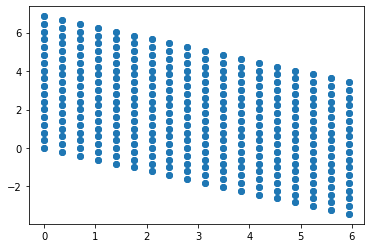

In [42]:
b1 = np.array([1,-1/3**0.5]) * 2 * np.pi / N1
b2 = np.array([0,2/3**0.5]) * 2 * np.pi / N2
def MomentumLabels(N1,N2):
    result = []
    for m in range(N1):
        for n in range(N2):
            for j in range(len(atoms)):
                result.append(((m,n),atoms[j]))
    return result
def MomentumLabelToK(myLabel):
    unitCellK = myLabel[0][0] * b1 + myLabel[0][1] * b2
    return unitCellK
myList = MomentumLabels(N1,N2)
kList = np.array([MomentumLabelToK(myLabel) for myLabel in myList])
plt.scatter(kList[:,0], kList[:,1])

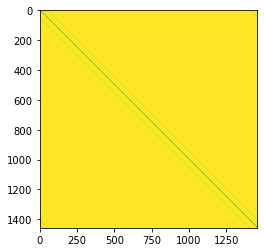

In [7]:
def Hamiltonian():
    n = N1 * N2 * len(atoms)
    h = np.zeros((n,n))
    #first, fill the atoms
    for i in range(N1):
        for j in range(N2):
            a = i+1
            b = j+1
            currA = LabelToIndex(((a,b),'a'))
            currB = LabelToIndex(((a,b),'b'))
            h[currA,currB] = -1.0
            h[currB,currA] = -1.0

            #unit cell bottom left
            a = i + 1
            b = (j-1+N2)%N2 + 1
            targetB = LabelToIndex(((a,b),'b'))
            h[currA,targetB] = -1.0
            h[targetB,currA] = -1.0
            
            #unit cell bottom right
            a = (i+1)%N1 +1
            b = (j-1+N2)%N2 + 1
            targetB = LabelToIndex(((a,b),'b'))
            h[currA,targetB] = -1.0
            h[targetB,currA] = -1.0         
    return h
def Fourier():
    momentumLabels = MomentumLabels(N1,N2)
    labels = Labels(N1,N2)
    n = N1 * N2 * len(atoms)
    f = np.zeros((n,n), dtype=complex)
    for i in range(n):
        r = LabelToR(labels[i])
        sigmaPrime = labels[i][1]
        for jj in range(n):
            sigma = momentumLabels[jj][1]
            if(sigma == sigmaPrime): 
                k = MomentumLabelToK(momentumLabels[jj])
                f[i,jj] = ((N1 * N2)**(-0.5))* np.exp(1j * np.dot(k,r))
    return f
f = Fourier()
h = Hamiltonian()
hk = (np.conj(f)).T @ h @ f
#plt.imshow(np.abs(f @ (np.conj(f).T)))
kspace = MomentumLabels(N1,N2)
plt.imshow(h)

4


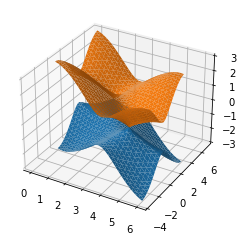

In [271]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
all_labels = MomentumLabels(N1,N2)
all_kx = []
all_ky = []
for i in range(0, len(all_labels), 2):
    k = MomentumLabelToK(all_labels[i])
    all_kx.append(k[0])
    all_ky.append(k[1])
E1 = []
E2 = []
c = 0
for i in range(0, hk.shape[0], 2):
    block = hk[i:i+2,i:i+2]
    eigs = la.eigh(block)[0]
    E1.append(eigs[0])
    E2.append(eigs[1])
ax.plot_trisurf(all_kx,all_ky,E1)
ax.plot_trisurf(all_kx,all_ky,E2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


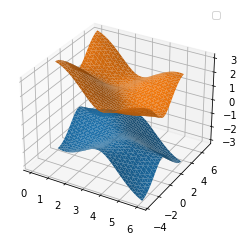

In [8]:
M = 1
def HamiltonianBoNi():
    n = N1 * N2 * len(atoms)
    h = np.zeros((n,n))
    #first, fill the atoms
    for i in range(N1):
        for j in range(N2):
            a = i+1
            b = j+1
            currA = LabelToIndex(((a,b),'a'))
            currB = LabelToIndex(((a,b),'b'))
            h[currA,currB] = -1.0
            h[currB,currA] = -1.0
            h[currA, currA] = M
            h[currB, currB] = -M

            #unit cell bottom left
            a = i + 1
            b = (j-1+N2)%N2 + 1
            targetB = LabelToIndex(((a,b),'b'))
            h[currA,targetB] = -1.0
            h[targetB,currA] = -1.0
            
            #unit cell bottom right
            a = (i+1)%N1 +1
            b = (j-1+N2)%N2 + 1
            targetB = LabelToIndex(((a,b),'b'))
            h[currA,targetB] = -1.0
            h[targetB,currA] = -1.0   
    return h
h = HamiltonianBoNi()
f = Fourier()
hk = (np.conj(f)).T @ h @ f
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
all_labels = MomentumLabels(N1,N2)
all_kx = []
all_ky = []
for i in range(0, len(all_labels), 2):
    k = MomentumLabelToK(all_labels[i])
    all_kx.append(k[0])
    all_ky.append(k[1])
E1 = []
E2 = []
for i in range(0, hk.shape[0], 2):
    block = hk[i:i+2,i:i+2]
    eigs = la.eigh(block)[0]
    E1.append(eigs[0])
    E2.append(eigs[1])
ax.plot_trisurf(all_kx,all_ky,E1)
ax.plot_trisurf(all_kx,all_ky,E2)
ax.legend()


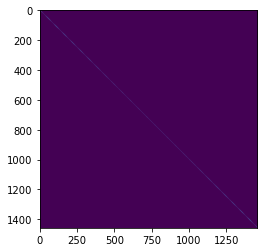

In [9]:
M = 0.1
phi = 0.7
t = 0.3
def HamiltonianHaldane():
    n = N1 * N2 * len(atoms)
    h = np.zeros((n,n), dtype=complex)
    #loop through all unit cells in physical space
    for i in range(N1):
        for j in range(N2):
            #inside unit cell
            a = i+1
            b = j+1
            currA = LabelToIndex(((a,b),'a'))
            currB = LabelToIndex(((a,b),'b'))
            h[currA,currB] = -1.0
            h[currB,currA] = -1.0
            h[currA,currA] = M
            h[currB,currB] = -M

            #unit cell bottom left
            a = i + 1
            b = (j-1+N2)%N2 + 1
            targetB = LabelToIndex(((a,b),'b'))
            h[currA,targetB] = -1.0
            h[targetB,currA] = -1.0
            targetA = LabelToIndex(((a,b),'a'))
            h[currA,targetA] = -t * np.exp(-1j * phi)
            h[targetA,currA] = -t * np.exp(1j * phi)
            targetB = LabelToIndex(((a,b),'b'))
            h[currB,targetB] = -t * np.exp(1j * phi)
            h[targetB,currB] = -t * np.exp(-1j * phi)

            #unit cell bottom right
            a = (i+1)%N1 +1
            b = (j-1+N2)%N2 + 1
            targetB = LabelToIndex(((a,b),'b'))
            h[currA,targetB] = -1.0
            h[targetB,currA] = -1.0
            targetA = LabelToIndex(((a,b),'a'))
            h[currA,targetA] = -t  * np.exp(1j * phi)
            h[targetA,currA] = -t * np.exp(-1j * phi)
            targetB = LabelToIndex(((a,b),'b'))
            h[currB,targetB] = -t * np.exp(-1j * phi)
            h[targetB,currB] = -t * np.exp(1j * phi)

            #unit cell left
            a = (i-1)%N1 +1
            b = j+1
            targetA = LabelToIndex(((a,b),'a'))
            h[currA,targetA] = -t * np.exp(1j * phi)
            h[targetA,currA] = -t * np.exp(-1j * phi)
            targetB = LabelToIndex(((a,b),'b'))
            h[currB,targetB] = -t * np.exp(-1j * phi)
            h[targetB,currB] = -t * np.exp(1j * phi)

    return h
h = HamiltonianHaldane()
f = Fourier()
hk = (np.conj(f)).T @ h @ f
plt.imshow(np.abs(hk))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


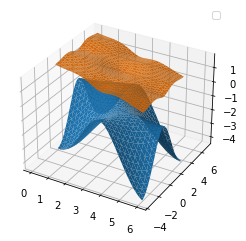

In [10]:
h = HamiltonianHaldane()
f = Fourier()
hk = (np.conj(f)).T @ h @ f
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
all_labels = MomentumLabels(N1,N2)
all_kx = []
all_ky = []
for i in range(0, len(all_labels), 2):
    k = MomentumLabelToK(all_labels[i])
    all_kx.append(k[0])
    all_ky.append(k[1])
E1 = []
E2 = []
for i in range(0, hk.shape[0], 2):
    block = hk[i:i+2,i:i+2]
    eigs = la.eigh(block)[0]
    E1.append(eigs[0])
    E2.append(eigs[1])
ax.plot_trisurf(all_kx,all_ky,E1)
ax.plot_trisurf(all_kx,all_ky,E2)
ax.legend()

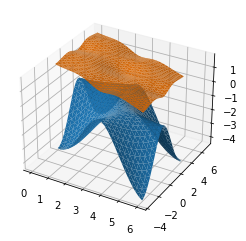

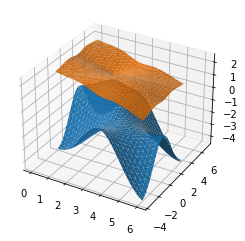

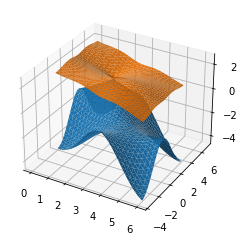

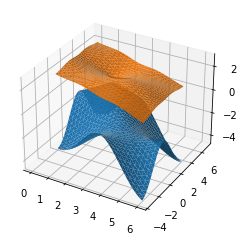

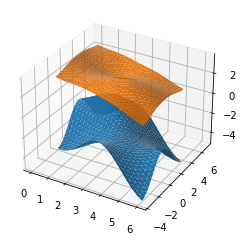

In [11]:
f = Fourier()
all_labels = MomentumLabels(N1,N2)
all_kx = []
all_ky = []
for i in range(0, len(all_labels), 2):
    k = MomentumLabelToK(all_labels[i])
    all_kx.append(k[0])
    all_ky.append(k[1])
EDiff = []
for M in [0,0.8,1.0,1.2,2.0]:
    h = HamiltonianHaldane()
    hk = (np.conj(f)).T @ h @ f
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    E1 = []
    E2 = []
    EMin = 100
    for i in range(0, hk.shape[0], 2):
        block = hk[i:i+2,i:i+2]
        eigs = la.eigh(block)[0]
        E1.append(eigs[0])
        E2.append(eigs[1])
        if np.abs(eigs[0] - eigs[1]) < EMin:
            EMin = np.abs(eigs[0] - eigs[1])

    EDiff.append(EMin)
    ax.plot_trisurf(all_kx,all_ky,E1)
    ax.plot_trisurf(all_kx,all_ky,E2)
#plt.plot([0,0.8,1.0,1.2,2.0],EDiff)
    


In [78]:
M = 0.9
N1 = 18
N2 = 18
b1 = np.array([1,-1/3**0.5]) * 2 * np.pi / N1
b2 = np.array([0,2/3**0.5]) * 2 * np.pi / N2

h = HamiltonianHaldane()
f = Fourier()
hk = (np.conj(f)).T @ h @ f

1.0000000000000007


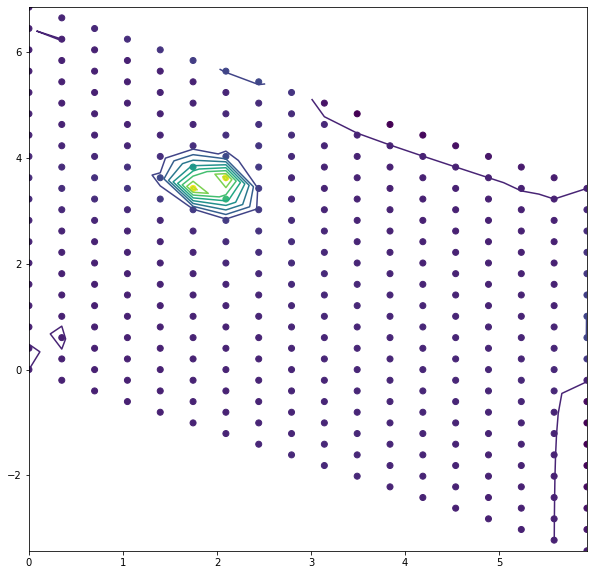

In [82]:
plaquette = np.zeros((N1 , N2))
all_kx = np.zeros((N1, N2))
all_ky = np.zeros((N1, N2))
for i in range(N1):
    for j in range(N2):
        currInd = i * N2 + j
        currBlock = hk[currInd*2:currInd*2+2,currInd*2:currInd*2+2]
        currEigVec = la.eigh(currBlock)[1][:,0]
        #up
        upInd = i*N2 + (j+1)%N2
        upBlock = hk[upInd*2:upInd*2+2,upInd*2:upInd*2+2]
        upEigVec = la.eigh(upBlock)[1][:,0]
        up = np.angle(np.dot(np.conj(currEigVec), upEigVec))
        
        #up right
        upRightInd = (i+1)%N1 * N2 + (j+1)%N2
        upRightBlock = hk[upRightInd*2:upRightInd*2+2,upRightInd*2:upRightInd*2+2]
        upRightEigVec = la.eigh(upRightBlock)[1][:,0]
        upRight = np.angle(np.dot(np.conj(upEigVec), upRightEigVec))

        #right
        rightInd = (i+1)%N1 * N2 + j
        rightBlock = hk[rightInd*2:rightInd*2+2,rightInd*2:rightInd*2+2]
        rightEigVec = la.eigh(rightBlock)[1][:,0]
        right = np.angle(np.dot(np.conj(upRightEigVec), rightEigVec))

        back = np.angle(np.dot(np.conj(rightEigVec), currEigVec))

        plaquette[i,j] = up + upRight + right + back

        while(plaquette[i,j] > np.pi or plaquette[i,j] < -np.pi):
            if plaquette[i,j] > np.pi:
                plaquette[i,j] = plaquette[i,j] - 2*np.pi
            else:
                plaquette[i,j] = plaquette[i,j] + 2*np.pi

        k = MomentumLabelToK(((i,j), 'a'))
        all_kx[i,j] = k[0]
        all_ky[i,j] = k[1]
fig = plt.figure(figsize=(10,10))
c = plt.contour(all_kx, all_ky, plaquette, 10)
plt.scatter(all_kx, all_ky, c=plaquette)
#plt.scatter(all_kx.flatten()[:20], all_ky.flatten()[:20])
#plt.clabel(c, inline=1, fontsize=15)
#plt.imshow(plaquette)
print(np.sum(plaquette) / (2 * np.pi))

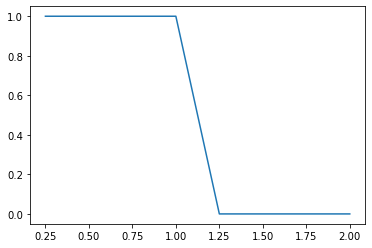

In [83]:
M  = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
Chern = [1,1,1,1,0,0,0,0]
plt.plot(M, Chern)